In [1]:
# Cell 1: Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [2]:
# Cell 2: Load and explore the dataset
# Load the dataset
df = pd.read_csv("StudentPerformanceFactors.csv")

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {df.shape}")
print(f"Dataset columns: {df.columns.tolist()}")

# Display first few rows
print("\nFirst 5 rows:")
print(df.head())

# Basic information about the dataset
print("\nDataset Info:")
print(df.info())

=== DATASET OVERVIEW ===
Dataset shape: (6607, 20)
Dataset columns: ['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level', 'Internet_Access', 'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender', 'Exam_Score']

First 5 rows:
   Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
0             23          84                  Low                High   
1             19          64                  Low              Medium   
2             24          98               Medium              Medium   
3             29          89                  Low              Medium   
4             19          92               Medium              Medium   

  Extracurricular_Activities  Sleep_Hours  Previous_Scores Motivation_Level  \
0      

=== MISSING VALUES ANALYSIS ===
Missing values count:
Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

Total missing values: 235
Percentage of missing values: 0.18%


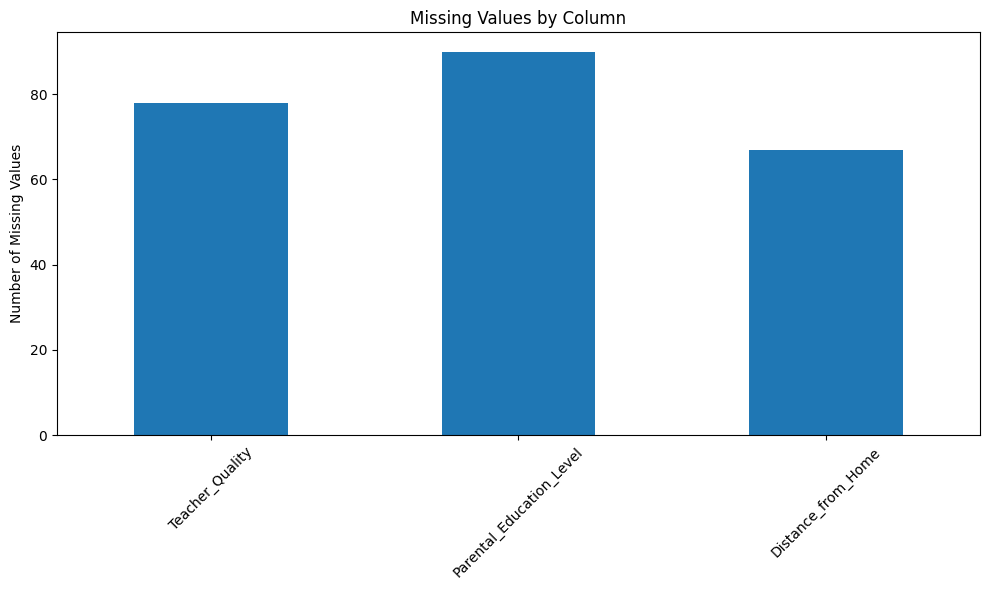

In [3]:
# Cell 3: Analyze missing values
print("=== MISSING VALUES ANALYSIS ===")
print("Missing values count:")
missing_values = df.isnull().sum()
print(missing_values)

print(f"\nTotal missing values: {missing_values.sum()}")
print(f"Percentage of missing values: {(missing_values.sum() / (df.shape[0] * df.shape[1])) * 100:.2f}%")

# Visualize missing values
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]
if len(missing_data) > 0:
    missing_data.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No missing values found!")

In [4]:
# Cell 4: Handle missing values
print("=== HANDLING MISSING VALUES ===")

# Create a copy of the dataframe
df_processed = df.copy()

# Handle missing values for categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns
print(f"Categorical columns: {categorical_cols.tolist()}")

for col in categorical_cols:
    if df_processed[col].isnull().sum() > 0:
        mode_value = df_processed[col].mode()[0] if len(df_processed[col].mode()) > 0 else 'Unknown'
        df_processed[col] = df_processed[col].fillna(mode_value)
        print(f"Filled {col} missing values with mode: {mode_value}")

# Handle missing values for numerical columns
numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
print(f"Numerical columns: {numerical_cols.tolist()}")

for col in numerical_cols:
    if df_processed[col].isnull().sum() > 0:
        median_value = df_processed[col].median()
        df_processed[col] = df_processed[col].fillna(median_value)
        print(f"Filled {col} missing values with median: {median_value}")

print("\nMissing values after handling:")
print(df_processed.isnull().sum())

=== HANDLING MISSING VALUES ===
Categorical columns: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Filled Teacher_Quality missing values with mode: Medium
Filled Parental_Education_Level missing values with mode: High School
Filled Distance_from_Home missing values with mode: Near
Numerical columns: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

Missing values after handling:
Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0


In [5]:
# Cell 5: Separate features and target variable
print("=== SEPARATING FEATURES AND TARGET ===")

# Define target variable (adjust this based on your dataset)
target_column = 'Exam_Score'  # Change this to your actual target column name
print(f"Target column: {target_column}")

# Check if target column exists
if target_column not in df_processed.columns:
    print(f"Warning: {target_column} not found in columns!")
    print(f"Available columns: {df_processed.columns.tolist()}")
    # You may need to adjust the target column name
else:
    # Separate features and target
    X = df_processed.drop(target_column, axis=1)
    y = df_processed[target_column]
    
    print(f"Features shape: {X.shape}")
    print(f"Target shape: {y.shape}")
    
    # Display target variable statistics
    print(f"\nTarget variable statistics:")
    print(f"Mean: {y.mean():.2f}")
    print(f"Std: {y.std():.2f}")
    print(f"Min: {y.min():.2f}")
    print(f"Max: {y.max():.2f}")

=== SEPARATING FEATURES AND TARGET ===
Target column: Exam_Score
Features shape: (6607, 19)
Target shape: (6607,)

Target variable statistics:
Mean: 67.24
Std: 3.89
Min: 55.00
Max: 101.00


In [6]:
# Cell 6: Encode categorical variables
print("=== ENCODING CATEGORICAL VARIABLES ===")

# Identify categorical columns in features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical features to encode: {categorical_features}")

if len(categorical_features) > 0:
    # Apply one-hot encoding
    print("Applying one-hot encoding...")
    X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)
    
    print(f"Shape before encoding: {X.shape}")
    print(f"Shape after encoding: {X_encoded.shape}")
    
    # Display new columns created
    new_columns = set(X_encoded.columns) - set(X.select_dtypes(include=[np.number]).columns)
    print(f"New encoded columns created: {len(new_columns)}")
    
else:
    print("No categorical variables to encode")
    X_encoded = X.copy()

print(f"Final encoded features shape: {X_encoded.shape}")

=== ENCODING CATEGORICAL VARIABLES ===
Categorical features to encode: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']
Applying one-hot encoding...
Shape before encoding: (6607, 19)
Shape after encoding: (6607, 27)
New encoded columns created: 21
Final encoded features shape: (6607, 27)


In [7]:
# Cell 7: Normalize/Standardize numerical features
print("=== STANDARDIZING NUMERICAL FEATURES ===")

# Identify numerical columns in the encoded dataset
numerical_features = X_encoded.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical features to standardize: {len(numerical_features)} columns")

# Initialize and fit the scaler
scaler = StandardScaler()

# Create a copy for processing
X_processed = X_encoded.copy()

# Standardize numerical features
X_processed[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

print("Standardization completed!")

# Display before and after statistics for first few numerical columns
print("\nBefore standardization (first 3 numerical columns):")
for col in numerical_features[:3]:
    print(f"{col}: mean={X_encoded[col].mean():.3f}, std={X_encoded[col].std():.3f}")

print("\nAfter standardization (first 3 numerical columns):")
for col in numerical_features[:3]:
    print(f"{col}: mean={X_processed[col].mean():.3f}, std={X_processed[col].std():.3f}")

=== STANDARDIZING NUMERICAL FEATURES ===
Numerical features to standardize: 6 columns
Standardization completed!

Before standardization (first 3 numerical columns):
Hours_Studied: mean=19.975, std=5.991
Attendance: mean=79.977, std=11.547
Sleep_Hours: mean=7.029, std=1.468

After standardization (first 3 numerical columns):
Hours_Studied: mean=-0.000, std=1.000
Attendance: mean=-0.000, std=1.000
Sleep_Hours: mean=-0.000, std=1.000


In [8]:
# Cell 8: Split dataset into train, validation, and test sets
print("=== SPLITTING DATASET ===")

# Set random state for reproducibility
RANDOM_STATE = 42

# First split: 70% train, 30% temp (which will be split into 15% val, 15% test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X_processed, y, 
    test_size=0.3, 
    random_state=RANDOM_STATE,
    shuffle=True
)

# Second split: Split the 30% temp into 15% validation and 15% test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,  # 0.5 of 30% = 15% each
    random_state=RANDOM_STATE,
    shuffle=True
)

# Display split information
total_samples = len(X_processed)
print(f"Total samples: {total_samples}")
print(f"Training set: {len(X_train)} samples ({len(X_train)/total_samples*100:.1f}%)")
print(f"Validation set: {len(X_val)} samples ({len(X_val)/total_samples*100:.1f}%)")
print(f"Test set: {len(X_test)} samples ({len(X_test)/total_samples*100:.1f}%)")

print(f"\nFeature dimensions:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

=== SPLITTING DATASET ===
Total samples: 6607
Training set: 4624 samples (70.0%)
Validation set: 991 samples (15.0%)
Test set: 992 samples (15.0%)

Feature dimensions:
X_train: (4624, 27)
X_val: (991, 27)
X_test: (992, 27)


**Reasoning**:
Instantiate, train, and evaluate the Gradient Boosting model.



=== VISUALIZING DATA DISTRIBUTION ===


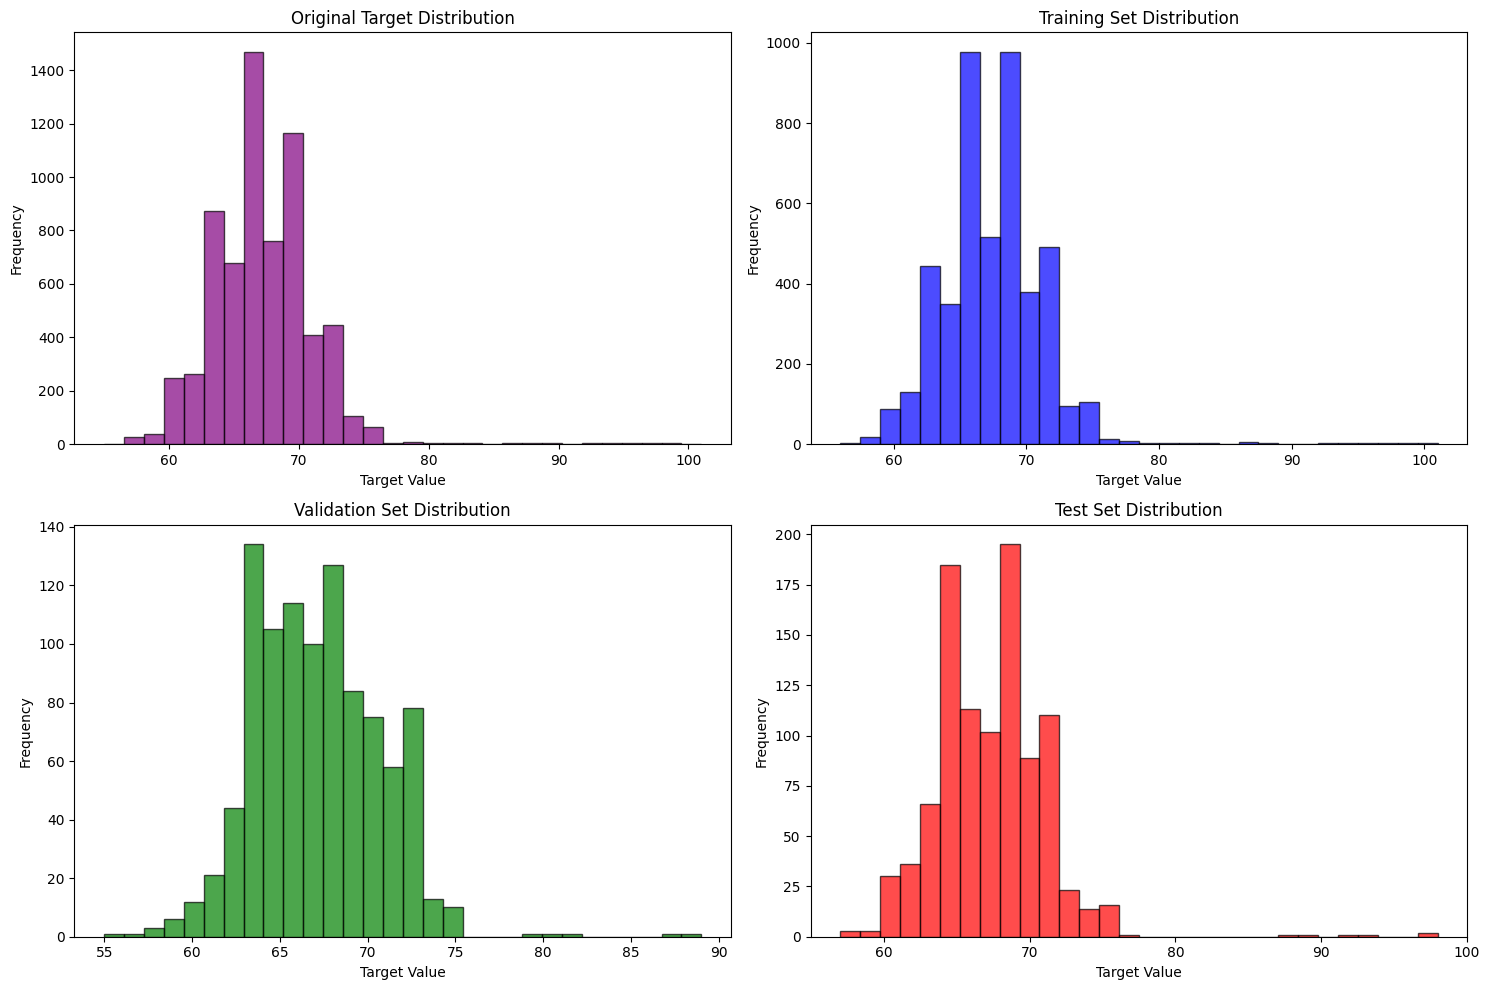

Distribution statistics:
Original - Mean: 67.236, Std: 3.890
Train - Mean: 67.237, Std: 3.967
Validation - Mean: 67.122, Std: 3.530
Test - Mean: 67.344, Std: 3.876


In [9]:
# Cell 9: Visualize target variable distribution across splits
print("=== VISUALIZING DATA DISTRIBUTION ===")

# Create subplots for target distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Original distribution
axes[0,0].hist(y, bins=30, alpha=0.7, color='purple', edgecolor='black')
axes[0,0].set_title('Original Target Distribution')
axes[0,0].set_xlabel('Target Value')
axes[0,0].set_ylabel('Frequency')

# Training set distribution
axes[0,1].hist(y_train, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0,1].set_title('Training Set Distribution')
axes[0,1].set_xlabel('Target Value')
axes[0,1].set_ylabel('Frequency')

# Validation set distribution
axes[1,0].hist(y_val, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_title('Validation Set Distribution')
axes[1,0].set_xlabel('Target Value')
axes[1,0].set_ylabel('Frequency')

# Test set distribution
axes[1,1].hist(y_test, bins=30, alpha=0.7, color='red', edgecolor='black')
axes[1,1].set_title('Test Set Distribution')
axes[1,1].set_xlabel('Target Value')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print distribution statistics
print("Distribution statistics:")
print(f"Original - Mean: {y.mean():.3f}, Std: {y.std():.3f}")
print(f"Train - Mean: {y_train.mean():.3f}, Std: {y_train.std():.3f}")
print(f"Validation - Mean: {y_val.mean():.3f}, Std: {y_val.std():.3f}")
print(f"Test - Mean: {y_test.mean():.3f}, Std: {y_test.std():.3f}")

In [10]:
# Cell 10: Save processed datasets
print("=== SAVING PROCESSED DATA ===")

try:
    # Save the datasets
    X_train.to_csv('X_train.csv', index=False)
    X_val.to_csv('X_val.csv', index=False)
    X_test.to_csv('X_test.csv', index=False)
    
    y_train.to_csv('y_train.csv', index=False)
    y_val.to_csv('y_val.csv', index=False)
    y_test.to_csv('y_test.csv', index=False)
    
    # Save feature names for reference
    feature_names = X_processed.columns.tolist()
    feature_names_df = pd.DataFrame({'feature_names': feature_names})
    feature_names_df.to_csv('feature_names.csv', index=False)
    
    # Save preprocessing information
    preprocessing_info = {
        'total_samples': len(X_processed),
        'num_features': len(feature_names),
        'target_column': target_column,
        'categorical_features_original': categorical_features,
        'numerical_features_count': len(numerical_features),
        'random_state': RANDOM_STATE
    }
    
    pd.DataFrame([preprocessing_info]).to_csv('preprocessing_info.csv', index=False)
    
    print("All processed datasets saved successfully!")
    print("\nSaved files:")
    print("- X_train.csv, X_val.csv, X_test.csv")
    print("- y_train.csv, y_val.csv, y_test.csv")
    print("- feature_names.csv")
    print("- preprocessing_info.csv")
    
except Exception as e:
    print(f"Error saving files: {e}")

=== SAVING PROCESSED DATA ===
All processed datasets saved successfully!

Saved files:
- X_train.csv, X_val.csv, X_test.csv
- y_train.csv, y_val.csv, y_test.csv
- feature_names.csv
- preprocessing_info.csv


In [11]:
# Cell 11: Final data quality checks
print("=== FINAL DATA QUALITY CHECKS ===")

# Check for any remaining missing values
print("1. Missing values check:")
for name, dataset in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
    missing = dataset.isnull().sum().sum()
    print(f"   {name}: {missing} missing values")

# Check for infinite values
print("\n2. Infinite values check:")
for name, dataset in [("X_train", X_train), ("X_val", X_val), ("X_test", X_test)]:
    infinite = np.isinf(dataset.select_dtypes(include=[np.number])).sum().sum()
    print(f"   {name}: {infinite} infinite values")

# Check data types
print(f"\n3. Data types in processed features:")
print(X_train.dtypes.value_counts())

# Check target variable consistency
print(f"\n4. Target variable ranges:")
print(f"   y_train: {y_train.min():.3f} to {y_train.max():.3f}")
print(f"   y_val: {y_val.min():.3f} to {y_val.max():.3f}")
print(f"   y_test: {y_test.min():.3f} to {y_test.max():.3f}")

print("\nDataset preparation completed successfully!")
print("Your data is now ready for machine learning model training.")

=== FINAL DATA QUALITY CHECKS ===
1. Missing values check:
   X_train: 0 missing values
   X_val: 0 missing values
   X_test: 0 missing values

2. Infinite values check:
   X_train: 0 infinite values
   X_val: 0 infinite values
   X_test: 0 infinite values

3. Data types in processed features:
bool       21
float64     6
Name: count, dtype: int64

4. Target variable ranges:
   y_train: 56.000 to 101.000
   y_val: 55.000 to 89.000
   y_test: 57.000 to 98.000

Dataset preparation completed successfully!
Your data is now ready for machine learning model training.


In [12]:
# Cell 12: Generate summary report
print("=== DATASET PREPARATION SUMMARY REPORT ===")
print("=" * 50)

print(f"Dataset: StudentPerformanceFactors.csv")
print(f"Target Variable: {target_column}")
print(f"Total Samples: {len(df):,}")
print(f"Total Features After Processing: {len(X_processed.columns):,}")

print(f"\nData Splits:")
print(f"   Training:   {len(X_train):,} samples ({len(X_train)/len(df)*100:.1f}%)")
print(f"   Validation: {len(X_val):,} samples ({len(X_val)/len(df)*100:.1f}%)")
print(f"   Test:       {len(X_test):,} samples ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nPreprocessing Steps Completed:")
print(f"   - Missing values handled")
print(f"   - Categorical variables encoded ({len(categorical_features)} variables)")
print(f"   - Numerical features standardized ({len(numerical_features)} features)")
print(f"   - Data split into train/val/test")
print(f"   - Processed data saved")

print(f"\nOutput Files Generated:")
print(f"   • Training data: X_train.csv, y_train.csv")
print(f"   • Validation data: X_val.csv, y_val.csv") 
print(f"   • Test data: X_test.csv, y_test.csv")
print(f"   • Metadata: feature_names.csv, preprocessing_info.csv")

print(f"\nReady for Model Training!")
print("=" * 50)

=== DATASET PREPARATION SUMMARY REPORT ===
Dataset: StudentPerformanceFactors.csv
Target Variable: Exam_Score
Total Samples: 6,607
Total Features After Processing: 27

Data Splits:
   Training:   4,624 samples (70.0%)
   Validation: 991 samples (15.0%)
   Test:       992 samples (15.0%)

Preprocessing Steps Completed:
   - Missing values handled
   - Categorical variables encoded (13 variables)
   - Numerical features standardized (6 features)
   - Data split into train/val/test
   - Processed data saved

Output Files Generated:
   • Training data: X_train.csv, y_train.csv
   • Validation data: X_val.csv, y_val.csv
   • Test data: X_test.csv, y_test.csv
   • Metadata: feature_names.csv, preprocessing_info.csv

Ready for Model Training!


In [13]:
# Cell 13: Import model libraries and evaluation metrics
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import time
import joblib
from scipy import stats

print("Model libraries imported successfully!")

Model libraries imported successfully!


In [14]:
# Cell 14: Define evaluation functions
def evaluate_regression_model(model, X_train, X_val, X_test, y_train, y_val, y_test, model_name):
    """
    Comprehensive evaluation function for regression models
    """
    results = {}
    
    # Make predictions on all sets
    train_pred = model.predict(X_train)
    val_pred = model.predict(X_val)
    test_pred = model.predict(X_test)
    
    # Calculate metrics for each set
    sets = [
        ('Train', y_train, train_pred),
        ('Validation', y_val, val_pred),
        ('Test', y_test, test_pred)
    ]
    
    print(f"\n=== {model_name} EVALUATION RESULTS ===")
    
    for set_name, y_true, y_pred in sets:
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        # Calculate additional metrics
        mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
        
        results[f'{set_name.lower()}_mse'] = mse
        results[f'{set_name.lower()}_rmse'] = rmse
        results[f'{set_name.lower()}_mae'] = mae
        results[f'{set_name.lower()}_r2'] = r2
        results[f'{set_name.lower()}_mape'] = mape
        
        print(f"\n{set_name} Set Metrics:")
        print(f"  MSE:  {mse:.4f}")
        print(f"  RMSE: {rmse:.4f}")
        print(f"  MAE:  {mae:.4f}")
        print(f"  R²:   {r2:.4f}")
        print(f"  MAPE: {mape:.2f}%")
    
    return results

def plot_predictions(y_true, y_pred, title):
    """Plot predicted vs actual values"""
    plt.figure(figsize=(8, 6))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{title}: Predicted vs Actual')
    plt.grid(True, alpha=0.3)
    
    # Calculate and display R²
    r2 = r2_score(y_true, y_pred)
    plt.text(0.05, 0.95, f'R² = {r2:.4f}', transform=plt.gca().transAxes, 
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.show()

=== RANDOM FOREST MODEL ===
Performing Grid Search for Random Forest...
Parameter combinations to test: 324
Fitting 5 folds for each of 324 candidates, totalling 1620 fits

Best Random Forest Parameters:
  max_depth: 20
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 300
Best Cross-Validation Score: 6.2851
Training Time: 131.21 seconds

=== Random Forest EVALUATION RESULTS ===

Train Set Metrics:
  MSE:  0.8287
  RMSE: 0.9103
  MAE:  0.4526
  R²:   0.9473
  MAPE: 0.66%

Validation Set Metrics:
  MSE:  3.8787
  RMSE: 1.9694
  MAE:  1.1592
  R²:   0.6884
  MAPE: 1.72%

Test Set Metrics:
  MSE:  5.0848
  RMSE: 2.2549
  MAE:  1.1444
  R²:   0.6612
  MAPE: 1.66%


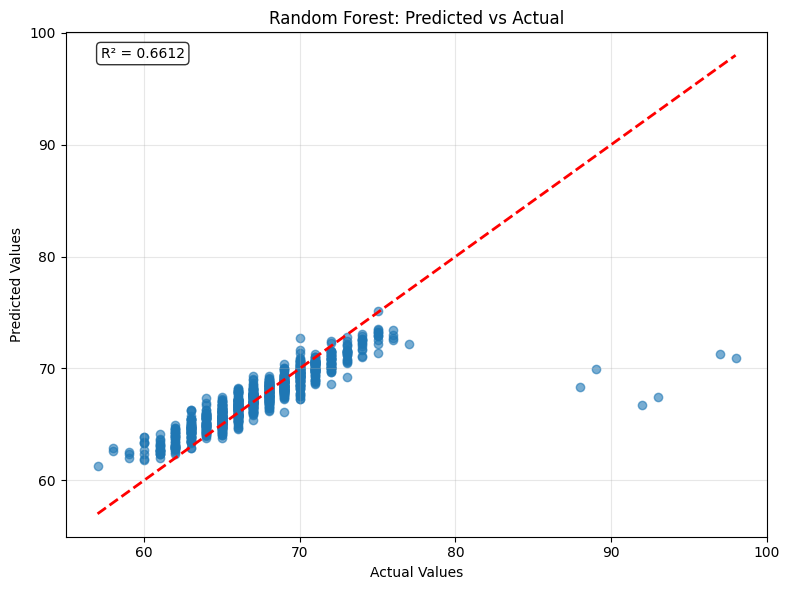


Top 10 Most Important Features:
                     feature  importance
1                 Attendance    0.328057
0              Hours_Studied    0.198396
3            Previous_Scores    0.086702
4          Tutoring_Sessions    0.043769
2                Sleep_Hours    0.038372
5          Physical_Activity    0.034493
8    Access_to_Resources_Low    0.018444
6   Parental_Involvement_Low    0.017364
20   Peer_Influence_Positive    0.014804
26               Gender_Male    0.014352

Random Forest model saved as 'random_forest_model.pkl'


In [15]:
# Cell 15: Random Forest Model Training and Evaluation
print("=== RANDOM FOREST MODEL ===")

# Start timing
start_time = time.time()

# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_jobs=-1)

# Define hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

print("Performing Grid Search for Random Forest...")
print(f"Parameter combinations to test: {len(rf_param_grid['n_estimators']) * len(rf_param_grid['max_depth']) * len(rf_param_grid['min_samples_split']) * len(rf_param_grid['min_samples_leaf']) * len(rf_param_grid['max_features'])}")

# Perform Grid Search
rf_grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
rf_grid_search.fit(X_train, y_train)

# Get the best model
rf_best_model = rf_grid_search.best_estimator_

# Training time
rf_training_time = time.time() - start_time

print(f"\nBest Random Forest Parameters:")
for param, value in rf_grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"Best Cross-Validation Score: {-rf_grid_search.best_score_:.4f}")
print(f"Training Time: {rf_training_time:.2f} seconds")

# Evaluate the model
rf_results = evaluate_regression_model(
    rf_best_model, X_train, X_val, X_test, y_train, y_val, y_test, "Random Forest"
)

# Add training time to results
rf_results['training_time'] = rf_training_time
rf_results['best_cv_score'] = -rf_grid_search.best_score_

# Plot predictions
plot_predictions(y_test, rf_best_model.predict(X_test), "Random Forest")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf_best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Save the model
joblib.dump(rf_best_model, 'random_forest_model.pkl')
print("\nRandom Forest model saved as 'random_forest_model.pkl'")

=== GRADIENT BOOSTING MODEL ===
Performing Grid Search for Gradient Boosting...
Parameter combinations to test: 729
Fitting 5 folds for each of 729 candidates, totalling 3645 fits

Best Gradient Boosting Parameters:
  learning_rate: 0.1
  max_depth: 3
  min_samples_leaf: 4
  min_samples_split: 10
  n_estimators: 200
  subsample: 0.8
Best Cross-Validation Score: 4.9462
Training Time: 1167.30 seconds

=== Gradient Boosting EVALUATION RESULTS ===

Train Set Metrics:
  MSE:  3.8554
  RMSE: 1.9635
  MAE:  0.6367
  R²:   0.7549
  MAPE: 0.89%

Validation Set Metrics:
  MSE:  3.0200
  RMSE: 1.7378
  MAE:  0.6413
  R²:   0.7574
  MAPE: 0.93%

Test Set Metrics:
  MSE:  3.8279
  RMSE: 1.9565
  MAE:  0.6936
  R²:   0.7449
  MAPE: 0.98%


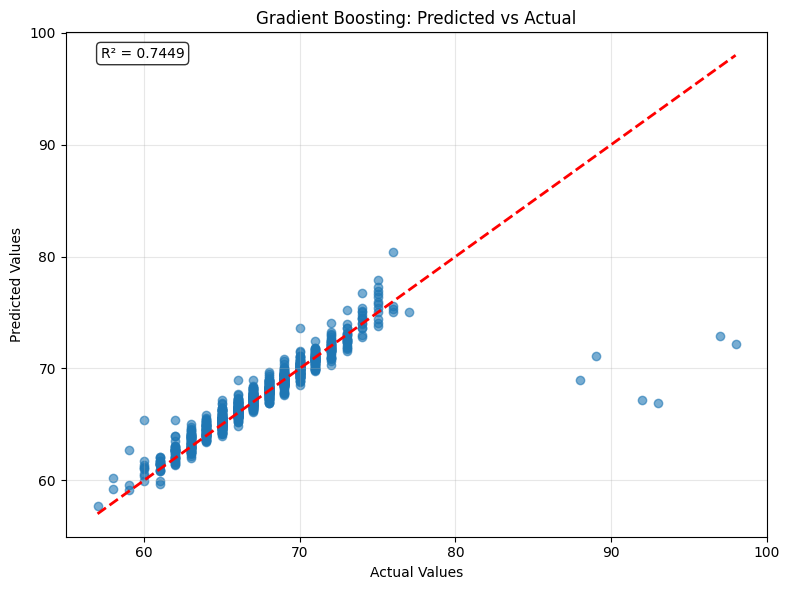


Top 10 Most Important Features:
                        feature  importance
1                    Attendance    0.437085
0                 Hours_Studied    0.272627
3               Previous_Scores    0.057070
4             Tutoring_Sessions    0.041749
8       Access_to_Resources_Low    0.026760
6      Parental_Involvement_Low    0.023892
9    Access_to_Resources_Medium    0.015113
7   Parental_Involvement_Medium    0.014910
20      Peer_Influence_Positive    0.011719
14            Family_Income_Low    0.011578

Gradient Boosting model saved as 'gradient_boosting_model.pkl'


In [16]:
# Cell 16: Gradient Boosting Model Training and Evaluation
print("=== GRADIENT BOOSTING MODEL ===")

# Start timing
start_time = time.time()

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Define hyperparameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

print("Performing Grid Search for Gradient Boosting...")
print(f"Parameter combinations to test: {len(gb_param_grid['n_estimators']) * len(gb_param_grid['learning_rate']) * len(gb_param_grid['max_depth']) * len(gb_param_grid['min_samples_split']) * len(gb_param_grid['min_samples_leaf']) * len(gb_param_grid['subsample'])}")

# Perform Grid Search
gb_grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# Fit the grid search
gb_grid_search.fit(X_train, y_train)

# Get the best model
gb_best_model = gb_grid_search.best_estimator_

# Training time
gb_training_time = time.time() - start_time

print(f"\nBest Gradient Boosting Parameters:")
for param, value in gb_grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"Best Cross-Validation Score: {-gb_grid_search.best_score_:.4f}")
print(f"Training Time: {gb_training_time:.2f} seconds")

# Evaluate the model
gb_results = evaluate_regression_model(
    gb_best_model, X_train, X_val, X_test, y_train, y_val, y_test, "Gradient Boosting"
)

# Add training time to results
gb_results['training_time'] = gb_training_time
gb_results['best_cv_score'] = -gb_grid_search.best_score_

# Plot predictions
plot_predictions(y_test, gb_best_model.predict(X_test), "Gradient Boosting")

# Feature importance
gb_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': gb_best_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(gb_feature_importance.head(10))

# Save the model
joblib.dump(gb_best_model, 'gradient_boosting_model.pkl')
print("\nGradient Boosting model saved as 'gradient_boosting_model.pkl'")

=== SUPPORT VECTOR MACHINE MODEL  ===
Performing Optimized Grid Search for Support Vector Machine...
Parameter combinations to test: 36
Fitting 3 folds for each of 20 candidates, totalling 60 fits

Best SVM Parameters from sample: {'kernel': 'linear', 'gamma': 0.1, 'epsilon': 0.1, 'C': 10}
Best Cross-Validation Score (on sample): 4.6291
Training Time: 96.61 seconds

=== Support Vector Machine EVALUATION RESULTS ===

Train Set Metrics:
  MSE:  4.6249
  RMSE: 2.1506
  MAE:  0.4592
  R²:   0.7060
  MAPE: 0.61%

Validation Set Metrics:
  MSE:  2.6912
  RMSE: 1.6405
  MAE:  0.3928
  R²:   0.7838
  MAPE: 0.55%

Test Set Metrics:
  MSE:  3.5031
  RMSE: 1.8717
  MAE:  0.4171
  R²:   0.7666
  MAPE: 0.56%


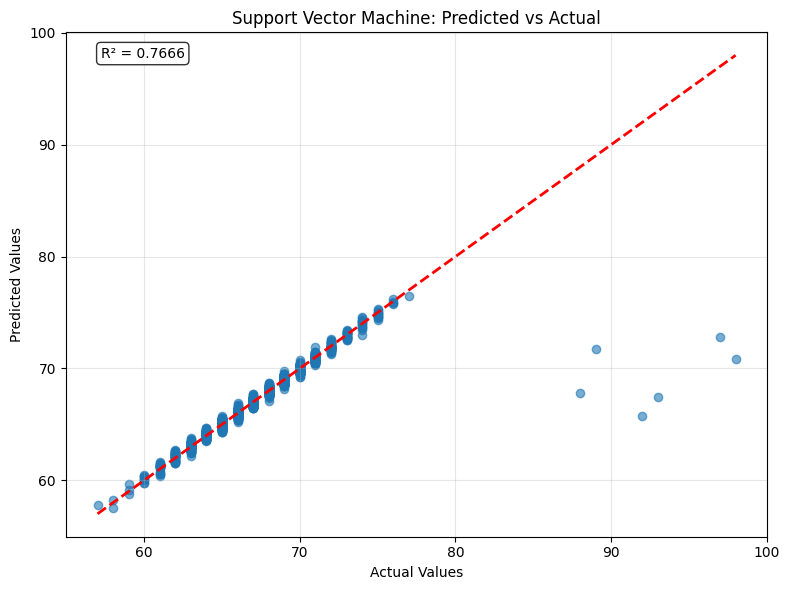


Top 10 Most Important Features (Permutation Importance):
                        feature  importance
1                    Attendance    0.717868
0                 Hours_Studied    0.458102
6      Parental_Involvement_Low    0.086776
8       Access_to_Resources_Low    0.086290
3               Previous_Scores    0.066200
4             Tutoring_Sessions    0.042025
14            Family_Income_Low    0.034644
7   Parental_Involvement_Medium    0.034203
11         Motivation_Level_Low    0.031633
25      Distance_from_Home_Near    0.030731

SVM model saved as 'svm_model.pkl'


In [17]:
# Cell 17 (Optimized): Support Vector Machine 
print("=== SUPPORT VECTOR MACHINE MODEL  ===")

# Start timing
start_time = time.time()

# Sample data for faster hyperparameter tuning (optional)
SAMPLE_SIZE = min(5000, len(X_train))  # Use max 5000 samples for tuning
if len(X_train) > SAMPLE_SIZE:
    print(f"Using sample of {SAMPLE_SIZE} records for hyperparameter tuning...")
    sample_indices = np.random.choice(len(X_train), SAMPLE_SIZE, replace=False)
    X_train_sample = X_train.iloc[sample_indices]
    y_train_sample = y_train.iloc[sample_indices]
else:
    X_train_sample = X_train
    y_train_sample = y_train

# Initialize SVR model
svm_model = SVR()

# Optimized hyperparameter grid for SVR (reduced search space)
svm_param_grid = {
    'kernel': ['rbf', 'linear'],  # Removed 'poly' as it's usually slower
    'C': [0.1, 1, 10],  # Reduced from [0.1, 1, 10, 100]
    'gamma': ['scale', 0.01, 0.1],  # Reduced search space
    'epsilon': [0.01, 0.1]  # Reduced from [0.01, 0.1, 0.2]
}

print("Performing Optimized Grid Search for Support Vector Machine...")
print(f"Parameter combinations to test: {len(svm_param_grid['kernel']) * len(svm_param_grid['C']) * len(svm_param_grid['gamma']) * len(svm_param_grid['epsilon'])}")

# Use RandomizedSearchCV instead of GridSearchCV for faster search
from sklearn.model_selection import RandomizedSearchCV

svm_random_search = RandomizedSearchCV(
    estimator=svm_model,
    param_distributions=svm_param_grid,
    n_iter=20,  # Test only 20 random combinations instead of all
    cv=3,  # Reduced CV folds from 5 to 3
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

# Fit the randomized search on sample data
svm_random_search.fit(X_train_sample, y_train_sample)

# Get the best model and retrain on full dataset
svm_best_params = svm_random_search.best_params_
print(f"\nBest SVM Parameters from sample: {svm_best_params}")

# Train final model with best parameters on full training set
svm_best_model = SVR(**svm_best_params)
svm_best_model.fit(X_train, y_train)

# Training time
svm_training_time = time.time() - start_time

print(f"Best Cross-Validation Score (on sample): {-svm_random_search.best_score_:.4f}")
print(f"Training Time: {svm_training_time:.2f} seconds")

# Evaluate the model
svm_results = evaluate_regression_model(
    svm_best_model, X_train, X_val, X_test, y_train, y_val, y_test, "Support Vector Machine"
)

# Add training time to results
svm_results['training_time'] = svm_training_time
svm_results['best_cv_score'] = -svm_random_search.best_score_

# Plot predictions
plot_predictions(y_test, svm_best_model.predict(X_test), "Support Vector Machine")

# Feature importance
from sklearn.inspection import permutation_importance

# Compute permutation importance on the test set
result = permutation_importance(svm_best_model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)

# Create a DataFrame for feature importance
svm_feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features (Permutation Importance):")
print(svm_feature_importance.head(10))

# Save the model
joblib.dump(svm_best_model, 'svm_model.pkl')
print("\nSVM model saved as 'svm_model.pkl'")

=== MODEL COMPARISON ===
Model Performance Comparison:
                    Model  Test_RMSE  Test_MAE  Test_R2  Test_MAPE  CV_Score  \
0           Random Forest     2.2549    1.1444   0.6612     1.6564    6.2851   
1       Gradient Boosting     1.9565    0.6936   0.7449     0.9784    4.9462   
2  Support Vector Machine     1.8717    0.4171   0.7666     0.5636    4.6291   

   Training_Time  
0       131.2131  
1      1167.3030  
2        96.6111  


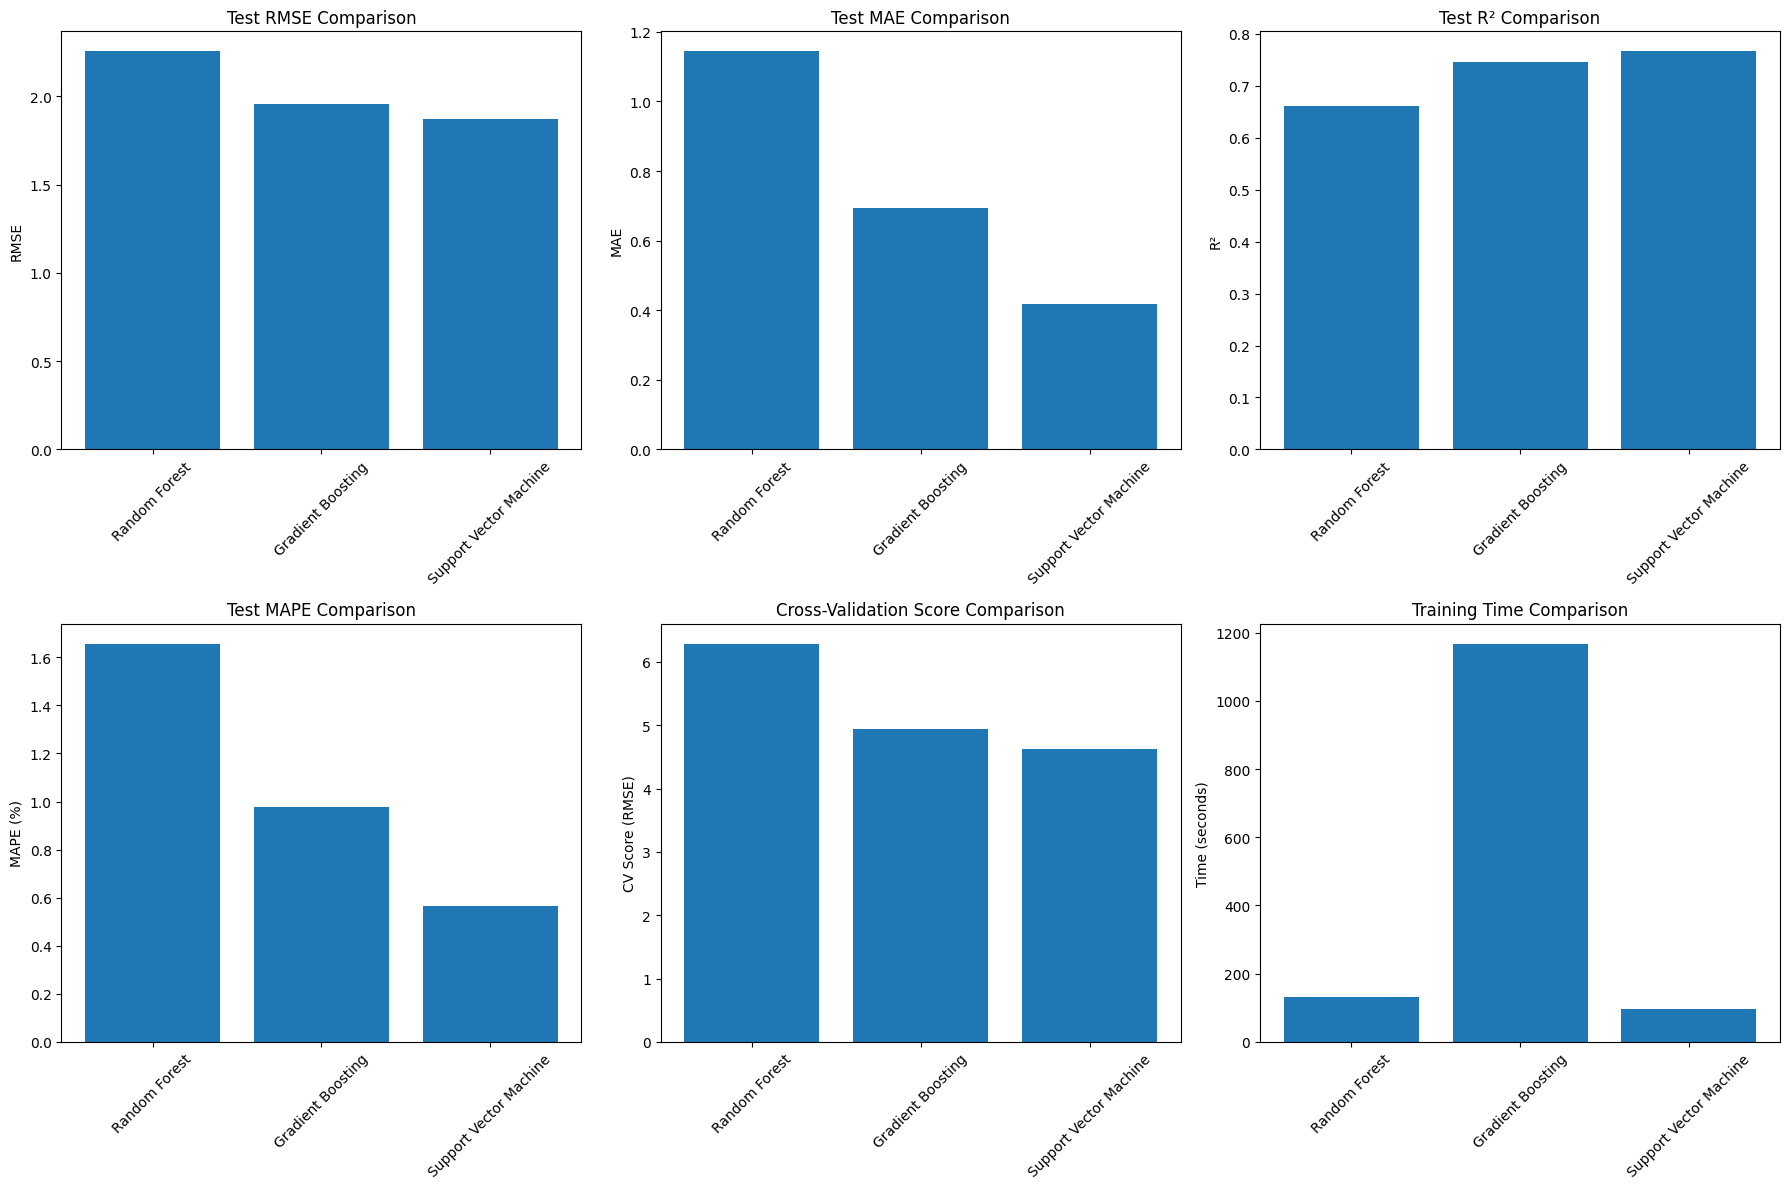


Model comparison results saved as 'model_comparison_results.csv'


In [18]:
# Cell 18: Compare all models
print("=== MODEL COMPARISON ===")

# Create comparison dataframe
models_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'Support Vector Machine'],
    'Test_RMSE': [rf_results['test_rmse'], gb_results['test_rmse'], svm_results['test_rmse']],
    'Test_MAE': [rf_results['test_mae'], gb_results['test_mae'], svm_results['test_mae']],
    'Test_R2': [rf_results['test_r2'], gb_results['test_r2'], svm_results['test_r2']],
    'Test_MAPE': [rf_results['test_mape'], gb_results['test_mape'], svm_results['test_mape']],
    'CV_Score': [rf_results['best_cv_score'], gb_results['best_cv_score'], svm_results['best_cv_score']],
    'Training_Time': [rf_results['training_time'], gb_results['training_time'], svm_results['training_time']]
})

print("Model Performance Comparison:")
print(models_comparison.round(4))

# Visualize model comparison
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# RMSE comparison
axes[0,0].bar(models_comparison['Model'], models_comparison['Test_RMSE'])
axes[0,0].set_title('Test RMSE Comparison')
axes[0,0].set_ylabel('RMSE')
axes[0,0].tick_params(axis='x', rotation=45)

# MAE comparison
axes[0,1].bar(models_comparison['Model'], models_comparison['Test_MAE'])
axes[0,1].set_title('Test MAE Comparison')
axes[0,1].set_ylabel('MAE')
axes[0,1].tick_params(axis='x', rotation=45)

# R² comparison
axes[0,2].bar(models_comparison['Model'], models_comparison['Test_R2'])
axes[0,2].set_title('Test R² Comparison')
axes[0,2].set_ylabel('R²')
axes[0,2].tick_params(axis='x', rotation=45)

# MAPE comparison
axes[1,0].bar(models_comparison['Model'], models_comparison['Test_MAPE'])
axes[1,0].set_title('Test MAPE Comparison')
axes[1,0].set_ylabel('MAPE (%)')
axes[1,0].tick_params(axis='x', rotation=45)

# CV Score comparison
axes[1,1].bar(models_comparison['Model'], models_comparison['CV_Score'])
axes[1,1].set_title('Cross-Validation Score Comparison')
axes[1,1].set_ylabel('CV Score (RMSE)')
axes[1,1].tick_params(axis='x', rotation=45)

# Training Time comparison
axes[1,2].bar(models_comparison['Model'], models_comparison['Training_Time'])
axes[1,2].set_title('Training Time Comparison')
axes[1,2].set_ylabel('Time (seconds)')
axes[1,2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Save comparison results
models_comparison.to_csv('model_comparison_results.csv', index=False)
print("\nModel comparison results saved as 'model_comparison_results.csv'")

=== BEST MODEL SELECTION ===
Best performing model: Support Vector Machine
Best Test R² Score: 0.7666

Detailed metrics for Support Vector Machine:
Training R²:   0.7060
Validation R²: 0.7838
Test R²:       0.7666
Training Time: 96.61 seconds

Good generalization: Training-Test R² difference: 0.0606


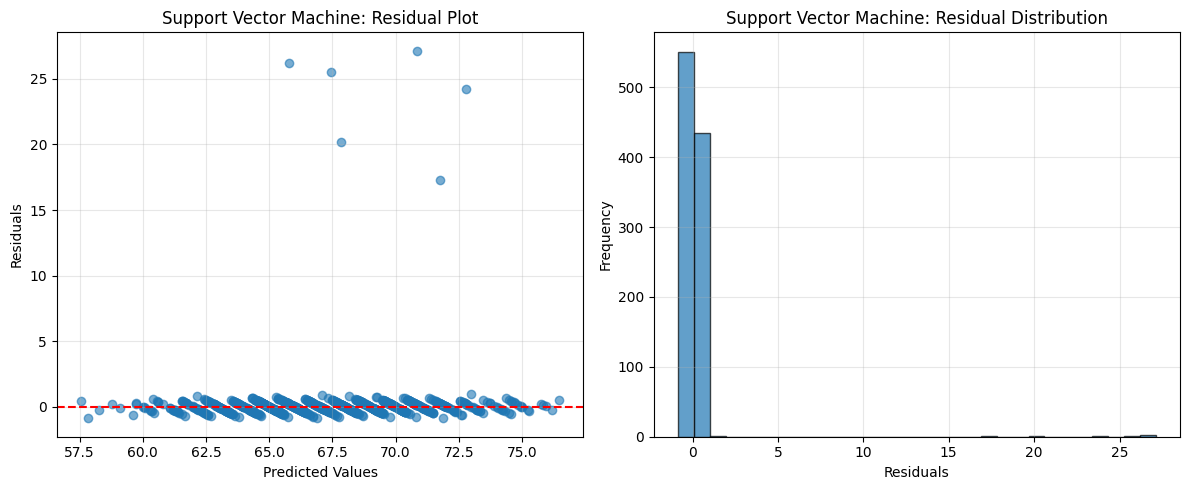


Shapiro-Wilk test for residual normality:
Statistic: 0.1509, p-value: 0.0000
Residuals may not be normally distributed (p ≤ 0.05)


In [19]:
# Cell 19: Select best model and perform detailed analysis
print("=== BEST MODEL SELECTION ===")

# Determine best model based on test R²
best_model_idx = models_comparison['Test_R2'].idxmax()
best_model_name = models_comparison.iloc[best_model_idx]['Model']
best_r2_score = models_comparison.iloc[best_model_idx]['Test_R2']

print(f"Best performing model: {best_model_name}")
print(f"Best Test R² Score: {best_r2_score:.4f}")

# Get the best model object
if best_model_name == 'Random Forest':
    best_model = rf_best_model
    best_results = rf_results
elif best_model_name == 'Gradient Boosting':
    best_model = gb_best_model
    best_results = gb_results
else:
    best_model = svm_best_model
    best_results = svm_results

print(f"\nDetailed metrics for {best_model_name}:")
print(f"Training R²:   {best_results['train_r2']:.4f}")
print(f"Validation R²: {best_results['validation_r2']:.4f}")
print(f"Test R²:       {best_results['test_r2']:.4f}")
print(f"Training Time: {best_results['training_time']:.2f} seconds")

# Check for overfitting
train_test_diff = abs(best_results['train_r2'] - best_results['test_r2'])
if train_test_diff > 0.1:
    print(f"\nWarning: Potential overfitting detected!")
    print(f"Training-Test R² difference: {train_test_diff:.4f}")
else:
    print(f"\nGood generalization: Training-Test R² difference: {train_test_diff:.4f}")

# Residual analysis for best model
test_predictions = best_model.predict(X_test)
residuals = y_test - test_predictions

plt.figure(figsize=(12, 5))

# Residual plot
plt.subplot(1, 2, 1)
plt.scatter(test_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title(f'{best_model_name}: Residual Plot')
plt.grid(True, alpha=0.3)

# Residual histogram
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'{best_model_name}: Residual Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical test for residual normality
from scipy.stats import shapiro
stat, p_value = shapiro(residuals)
print(f"\nShapiro-Wilk test for residual normality:")
print(f"Statistic: {stat:.4f}, p-value: {p_value:.4f}")
if p_value > 0.05:
    print("Residuals appear to be normally distributed (p > 0.05)")
else:
    print("Residuals may not be normally distributed (p ≤ 0.05)")

In [20]:
# Cell 20: Save all model results and create final summary
print("=== SAVING FINAL RESULTS ===")

# Create comprehensive results dictionary
final_results = {
    'random_forest': rf_results,
    'gradient_boosting': gb_results,
    'support_vector_machine': svm_results
}

# Save individual model results
for model_name, results in final_results.items():
    results_df = pd.DataFrame([results])
    results_df.to_csv(f'{model_name}_detailed_results.csv', index=False)
    print(f"Saved {model_name}_detailed_results.csv")

# Create final summary report
summary_report = f"""
MODEL TRAINING AND EVALUATION SUMMARY REPORT
============================================

Dataset: StudentPerformanceFactors.csv
Target Variable: {target_column}
Models Evaluated: Random Forest, Gradient Boosting, Support Vector Machine

BEST MODEL: {best_model_name}
Best Test R² Score: {best_r2_score:.4f}

DETAILED RESULTS:
{models_comparison.to_string(index=False)}

TRAINING CONFIGURATION:
- Cross-validation folds: 5
- Hyperparameter tuning: Grid Search
- Data split: 70% train, 15% validation, 15% test
- Feature scaling: StandardScaler applied
- Random state: 42

FILES GENERATED:
- Model files: random_forest_model.pkl, gradient_boosting_model.pkl, svm_model.pkl
- Results: model_comparison_results.csv
- Detailed results: [model_name]_detailed_results.csv

NEXT STEPS:
1. Use the best model ({best_model_name}) for predictions
2. Consider ensemble methods if needed
3. Deploy the model for production use
"""

# Save summary report
with open('model_training_summary.txt', 'w') as f:
    f.write(summary_report)

print("Final summary report saved as 'model_training_summary.txt'")
print("\nModel training and evaluation completed successfully!")
print(f"Best model: {best_model_name} with R² = {best_r2_score:.4f}")

=== SAVING FINAL RESULTS ===
Saved random_forest_detailed_results.csv
Saved gradient_boosting_detailed_results.csv
Saved support_vector_machine_detailed_results.csv
Final summary report saved as 'model_training_summary.txt'

Model training and evaluation completed successfully!
Best model: Support Vector Machine with R² = 0.7666


In [21]:
# Cell 21: Display best accuracy results
print("=== FINAL MODEL ACCURACY COMPARISON ===")
print("=" * 50)

# Display the comparison table again
print("Complete Model Performance Comparison:")
print(models_comparison.round(4))

# Find best model for each metric
best_rmse_model = models_comparison.loc[models_comparison['Test_RMSE'].idxmin(), 'Model']
best_mae_model = models_comparison.loc[models_comparison['Test_MAE'].idxmin(), 'Model']
best_r2_model = models_comparison.loc[models_comparison['Test_R2'].idxmax(), 'Model']
best_mape_model = models_comparison.loc[models_comparison['Test_MAPE'].idxmin(), 'Model']
best_speed_model = models_comparison.loc[models_comparison['Training_Time'].idxmin(), 'Model']

print(f"\nBEST PERFORMERS BY METRIC:")
print(f"Lowest RMSE (Best):     {best_rmse_model}")
print(f"Lowest MAE (Best):      {best_mae_model}")
print(f"Highest R² (Best):      {best_r2_model}")
print(f"Lowest MAPE (Best):     {best_mape_model}")
print(f"Fastest Training:       {best_speed_model}")

# Overall best model (using R² as primary metric)
overall_best = models_comparison.loc[models_comparison['Test_R2'].idxmax()]
print(f"\nOVERALL BEST MODEL: {overall_best['Model']}")
print(f"Test R² Score: {overall_best['Test_R2']:.4f}")
print(f"Test RMSE: {overall_best['Test_RMSE']:.4f}")
print(f"Test MAE: {overall_best['Test_MAE']:.4f}")
print(f"Training Time: {overall_best['Training_Time']:.2f} seconds")

# Performance interpretation
best_r2_score = overall_best['Test_R2']
if best_r2_score >= 0.9:
    performance_level = "Excellent"
elif best_r2_score >= 0.8:
    performance_level = "Good"
elif best_r2_score >= 0.7:
    performance_level = "Fair"
else:
    performance_level = "Poor"

print(f"\nModel Performance Level: {performance_level}")
print(f"The model explains {best_r2_score*100:.1f}% of the variance in the target variable.")

=== FINAL MODEL ACCURACY COMPARISON ===
Complete Model Performance Comparison:
                    Model  Test_RMSE  Test_MAE  Test_R2  Test_MAPE  CV_Score  \
0           Random Forest     2.2549    1.1444   0.6612     1.6564    6.2851   
1       Gradient Boosting     1.9565    0.6936   0.7449     0.9784    4.9462   
2  Support Vector Machine     1.8717    0.4171   0.7666     0.5636    4.6291   

   Training_Time  
0       131.2131  
1      1167.3030  
2        96.6111  

BEST PERFORMERS BY METRIC:
Lowest RMSE (Best):     Support Vector Machine
Lowest MAE (Best):      Support Vector Machine
Highest R² (Best):      Support Vector Machine
Lowest MAPE (Best):     Support Vector Machine
Fastest Training:       Support Vector Machine

OVERALL BEST MODEL: Support Vector Machine
Test R² Score: 0.7666
Test RMSE: 1.8717
Test MAE: 0.4171
Training Time: 96.61 seconds

Model Performance Level: Fair
The model explains 76.7% of the variance in the target variable.
